In [848]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

## Question 1.

1.

In [849]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Eugene Pinsky/Homework_8/heart_failure_linear_model/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [851]:
df = df[["creatinine_phosphokinase","serum_creatinine","serum_sodium","platelets","DEATH_EVENT"]]

#Extracting the two dataframes below:

#surviving patients
df_0 = df[ df["DEATH_EVENT"] == 0 ]

#deceased patients
df_1 = df[ df["DEATH_EVENT"] == 1 ]

2.

In [852]:
df.corr()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
creatinine_phosphokinase,1.000000,-0.016408,0.059550,0.024463,0.062728
serum_creatinine,-0.016408,1.000000,-0.189095,-0.041198,0.294278
serum_sodium,0.059550,-0.189095,1.000000,0.062125,-0.195204
platelets,0.024463,-0.041198,0.062125,1.000000,-0.049139
DEATH_EVENT,0.062728,0.294278,-0.195204,-0.049139,1.000000


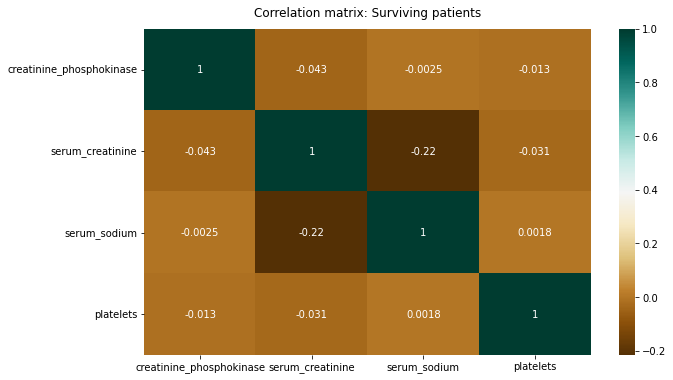

In [853]:
matrix= df_0[["creatinine_phosphokinase","serum_creatinine","serum_sodium","platelets"]].corr()
plt.figure(figsize=(10, 6))
heatmap= sns.heatmap(matrix, annot=True, cmap='BrBG')
heatmap.set_title('Correlation matrix: Surviving patients', fontdict={'fontsize':12}, pad=12)
plt.savefig("Correlation matrix: Surviving patients")

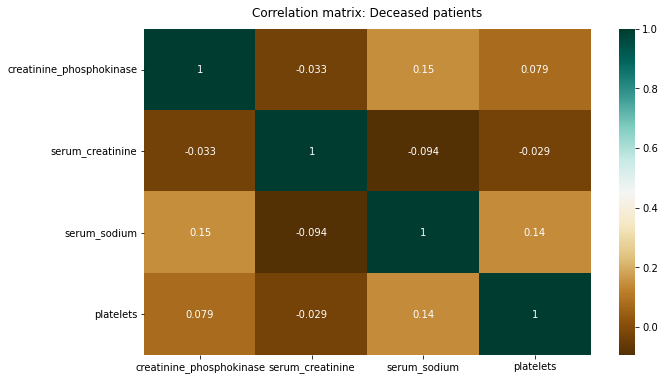

In [854]:
matrix= df_1[["creatinine_phosphokinase","serum_creatinine","serum_sodium","platelets"]].corr()
plt.figure(figsize=(10, 6))
heatmap= sns.heatmap(matrix, annot=True, cmap='BrBG')
heatmap.set_title('Correlation matrix: Deceased patients', fontdict={'fontsize':12}, pad=12)
plt.savefig("Correlation matrix: Deceased patients")

## Question 2.

# Surviving Patients

**Surviving Patients**

In [855]:
df_q2_0 = df_0[["platelets","serum_creatinine"]]
X_train , X_test, Y_train, Y_test = train_test_split(df_q2_0[["platelets"]],df_q2_0[["serum_creatinine"]],test_size=0.5,random_state=42)

1. Linear regression
> y = ax + b

a)

In [856]:
#fitting the model to the data
lin_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =1)

b)

In [857]:
print("The weights of the linear regression function are: " + str(lin_coef))

The weights of the linear regression function are: [-2.93473058e-07  1.31449738e+00]


c)

In [858]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(lin_coef,X_test) # does Y_pred = lin_coef[0] * X_test + lin_coef[1]

d)

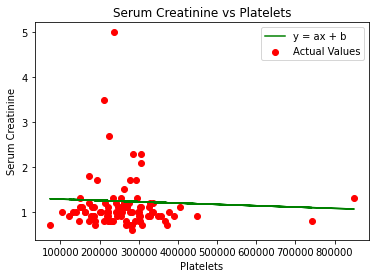

In [859]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = ax + b","Actual Values",])
plt.show()

e)

In [860]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 33.85


2. Quadratic 
>y = ax2 + bx + c

a)

In [861]:
#fitting the model to the data
quad_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =2)

b)

In [862]:
print("The weights of the quadratic function are: " + str(quad_coef))

The weights of the quadratic function are: [ 5.51837146e-12 -3.60956544e-06  1.75998349e+00]


c)

In [863]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(quad_coef,X_test)

d)

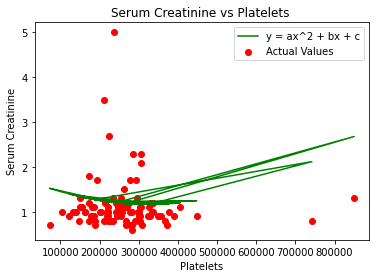

In [864]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets ")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = ax^2 + bx + c","Actual Values",])
plt.show()

e)

In [865]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

# computing array of residuals
residuals =  Y_test - Y_pred 

# Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 38.04


3. Cubic spline
> y = ax^3 + bx^2 + cx + d



a)

In [866]:
#fitting the model to the data
cube_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =3)

b)

In [867]:
print("The weights of the cubic spline function are: " + str(cube_coef))

The weights of the cubic spline function are: [ 1.36579315e-17 -6.29160600e-12 -6.61695812e-07  1.55556556e+00]


c)

In [868]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(cube_coef,X_test)

d)

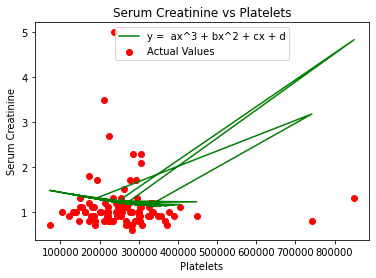

In [869]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y =  ax^3 + bx^2 + cx + d","Actual Values",])
plt.show()

e)

In [870]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 52.43


4. Generalized Linear Model
> y = a log x + b



a)

In [871]:
#getting log of independant feature X_train
X_train_log = np.log(np.array(X_train["platelets"])) 
coeff_log_1 = np.polyfit(X_train_log,np.array(Y_train["serum_creatinine"]),1)

b)

In [872]:
#printing weights
print("The weights for the generalised linear model (y = a log x + b) are: " + str(coeff_log_1))

The weights for the generalised linear model (y = a log x + b) are: [-0.11801909  2.70299497]


c)

In [873]:
#Finding predicted values using computed weights
Y_pred = (quad_coef[0] * (np.log(X_test)) ) + quad_coef[1] 

d)

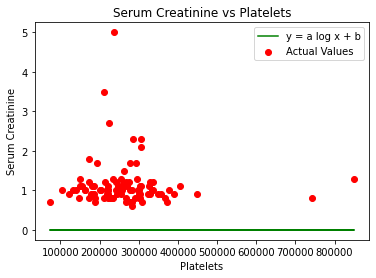

In [874]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = a log x + b","Actual Values",])
plt.show()

e)

In [875]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE.values[0]))

The Sum of Squared Residuals is: 164.23



5. Generalized Linear Model
  > log y = a log x + b

  >y = exp(a log x) * exp(b)

a)

In [876]:
#getting log of dependent (Y_train) and independent(X_train) 
Y_train_log = np.log(np.array(Y_train["serum_creatinine"]))
X_train_log = np.log(np.array(X_train["platelets"]))
#finding the curve using polyfit to fit to the data
coeff_log_2= np.polyfit(X_train_log,Y_train_log,1)

b)

In [877]:
#printing weights
print("The weights for the generalized linear model (log y = a log x + b) are : " + str(coeff_log_2))

The weights for the generalized linear model (log y = a log x + b) are : [-0.08590434  1.18341828]


c)

In [878]:
#Finding predicted values using computed coefficients
Y_pred = np.exp(coeff_log_2[0] * np.log(X_test)) * math.exp(coeff_log_2[1])

d)

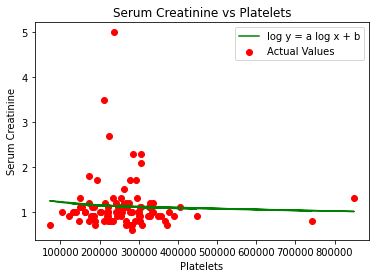

In [879]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["log y = a log x + b","Actual Values",])
plt.show()

e)

In [880]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE.values[0]))

The Sum of Squared Residuals is: 32.93


# Deceased patients

In [881]:
df_q2_1= df_1[["platelets","serum_creatinine"]]
X_train , X_test, Y_train, Y_test = train_test_split(df_q2_1[["platelets"]],df_q2_1[["serum_creatinine"]],test_size=0.5,random_state=42)

1. Linear regression
> y = ax + b

a)

In [882]:
#fitting the model to the data
lin_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =1)

b)

In [883]:
print("The weights of the linear regression function are: " + str(lin_coef))

The weights of the linear regression function are: [-1.50858345e-06  2.05314839e+00]


c)

In [884]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(lin_coef,X_test)

d)

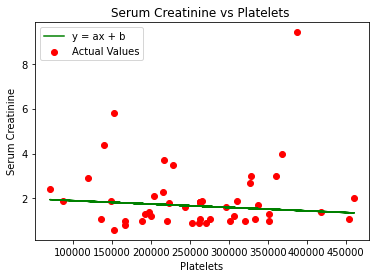

In [885]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets ")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = ax + b","Actual Values",])
plt.show()

e)

In [886]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 115.91


2. Quadratic 
>y = ax^2 + bx + c

a)

In [887]:
#fitting the model to the data
quad_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =2)

b)

In [888]:
print("The weights of the quadratic function are: " + str(quad_coef))

The weights of the quadratic function are: [ 1.30680369e-12 -2.30057834e-06  2.15567127e+00]


c)

In [889]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(quad_coef,X_test)

d)

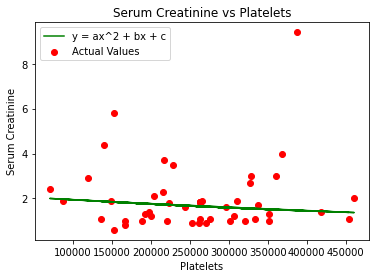

In [890]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = ax^2 + bx + c","Actual Values"])
plt.show()

e)

In [891]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 115.93


3. Cubic spline
> y = ax^3 + bx^2 + cx + d


a)

In [892]:
#fitting the model to the data
cube_coef = np.polyfit(np.array(X_train["platelets"]),np.array(Y_train["serum_creatinine"]),deg =3)

b)

In [893]:
print("The weights of the cubic spline function are: " + str(cube_coef))

The weights of the cubic spline function are: [ 6.23505583e-17 -5.81138353e-11  1.35239944e-05  1.01580573e+00]


c)

In [894]:
#Finding predicted values using computed coefficients
Y_pred = np.polyval(cube_coef,X_test)

d)

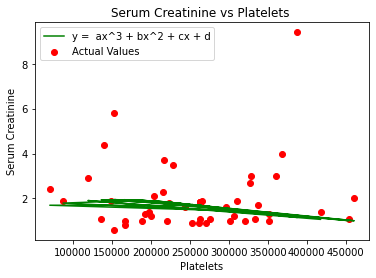

In [895]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets ")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y =  ax^3 + bx^2 + cx + d","Actual Values"])
plt.show()

e)

In [896]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE))

The Sum of Squared Residuals is: 123.92


4. Generalized Linear Model
> y = a log x + b


a)

In [897]:
#getting log of independant feature X_train
X_train_log = np.log(np.array(X_train["platelets"])) 
coeff_log_1 = np.polyfit(X_train_log,np.array(Y_train["serum_creatinine"]),1)

b)

In [898]:
#printing weights
print("The weights for the Generalised linear model(1) are: "+str(coeff_log_1))

The weights for the Generalised linear model(1) are: [-0.24702019  4.71927025]


c)

In [899]:
#Finding predicted values using computed coefficients
Y_pred = (quad_coef[0] * (np.log(X_test)) ) + quad_coef[1]

d)

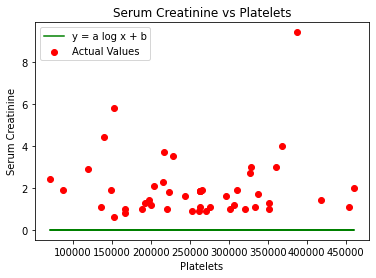

In [900]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["y = a log x + b","Actual Values",])
plt.show()

e)

In [901]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE.values[0]))

The Sum of Squared Residuals is: 301.21


5. Generalized Linear Model
  > log y = a log x + b

  >y = e(a log x) * e(b)

a)

In [902]:
#getting log of dependent (Y_train) and independent(X_train) 
Y_train_log = np.log(np.array(Y_train["serum_creatinine"]))
X_train_log = np.log(np.array(X_train["platelets"]))
#finding the curve using polyfit to fit to the data
coeff_log_2 = np.polyfit(X_train_log,Y_train_log,1)

b)

In [903]:
#printing weights
print("The weights for the Generalised linear model(2) are: "+str(coeff_log_2))

The weights for the Generalised linear model(2) are: [-0.08149637  1.36027053]


c)

In [904]:
#Finding predicted values using computed coefficients
Y_pred = np.exp(coeff_log_2[0] * np.log(X_test)) * math.exp(coeff_log_2[1])

d)

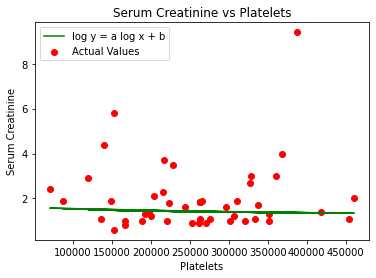

In [905]:
plt.scatter(X_test,Y_test, color = "red")
plt.plot(X_test,Y_pred, color = "green")
plt.title("Serum Creatinine vs Platelets")
plt.xlabel("Platelets")
plt.ylabel("Serum Creatinine")
plt.legend(["log y = a log x + b","Actual Values",])
plt.show()

e)

In [906]:
#converting to array for numpy operations
Y_test = np.array(Y_test)

#computing array of residuals
residuals =  Y_test - Y_pred 

#Comuting sum of squared residuals
SSE = round(np.sum(residuals**2),2)

print("The Sum of Squared Residuals is: "+str(SSE.values[0]))

The Sum of Squared Residuals is: 124.84
